   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

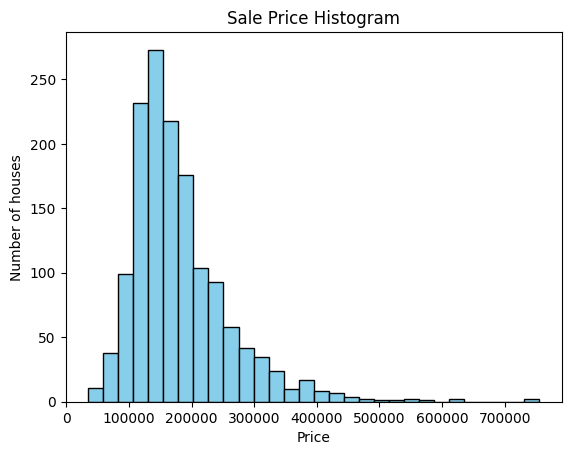

ZALEŻNOŚĆ SALES PRICE OD LOT AREA


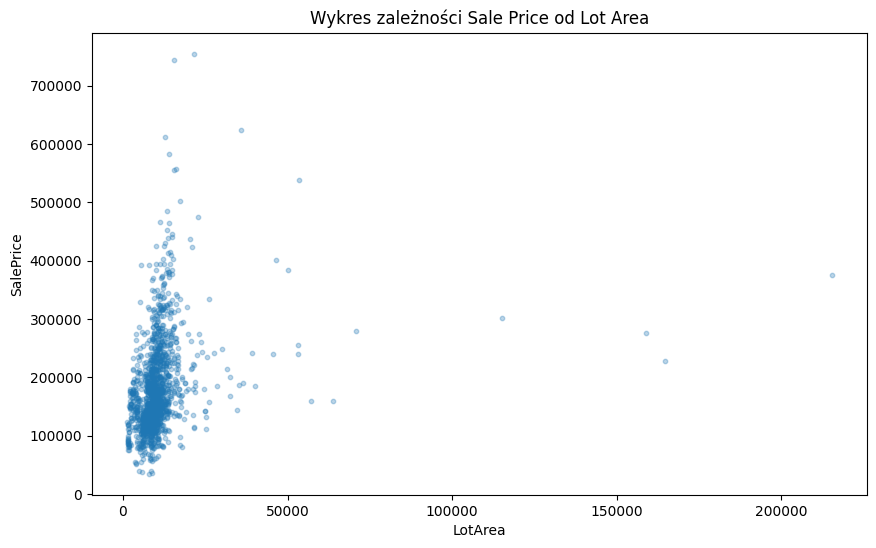

ZALEŻNOŚĆ SALES PRICE OD LOT GRLIVAREA


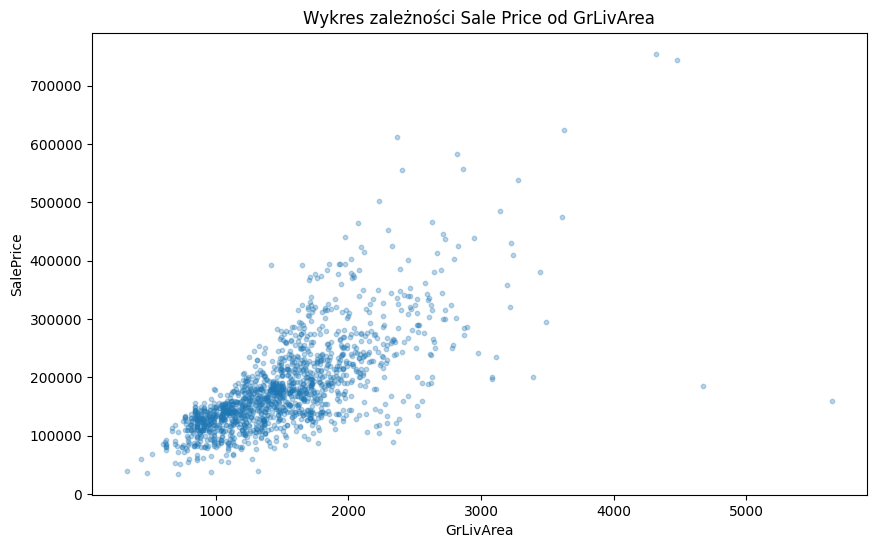

ZALEŻNOŚĆ SALES PRICE OD NEIGHBOURHOOD


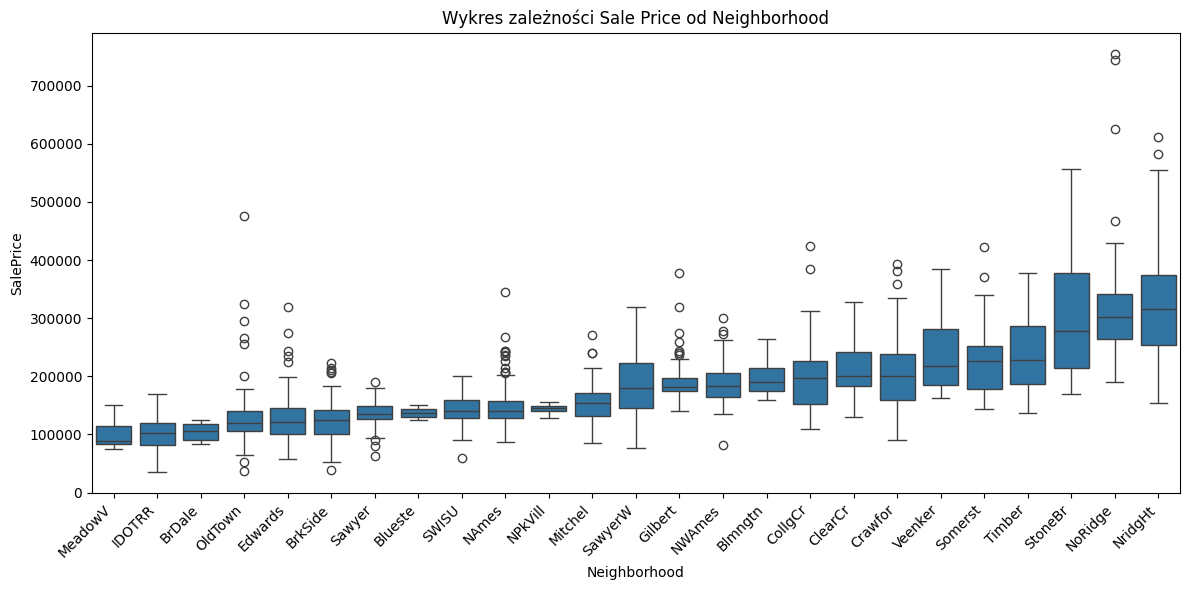

ZALEŻNOŚĆ SALES PRICE OD OVERALLCOND ORAZ OVERALLQUAL


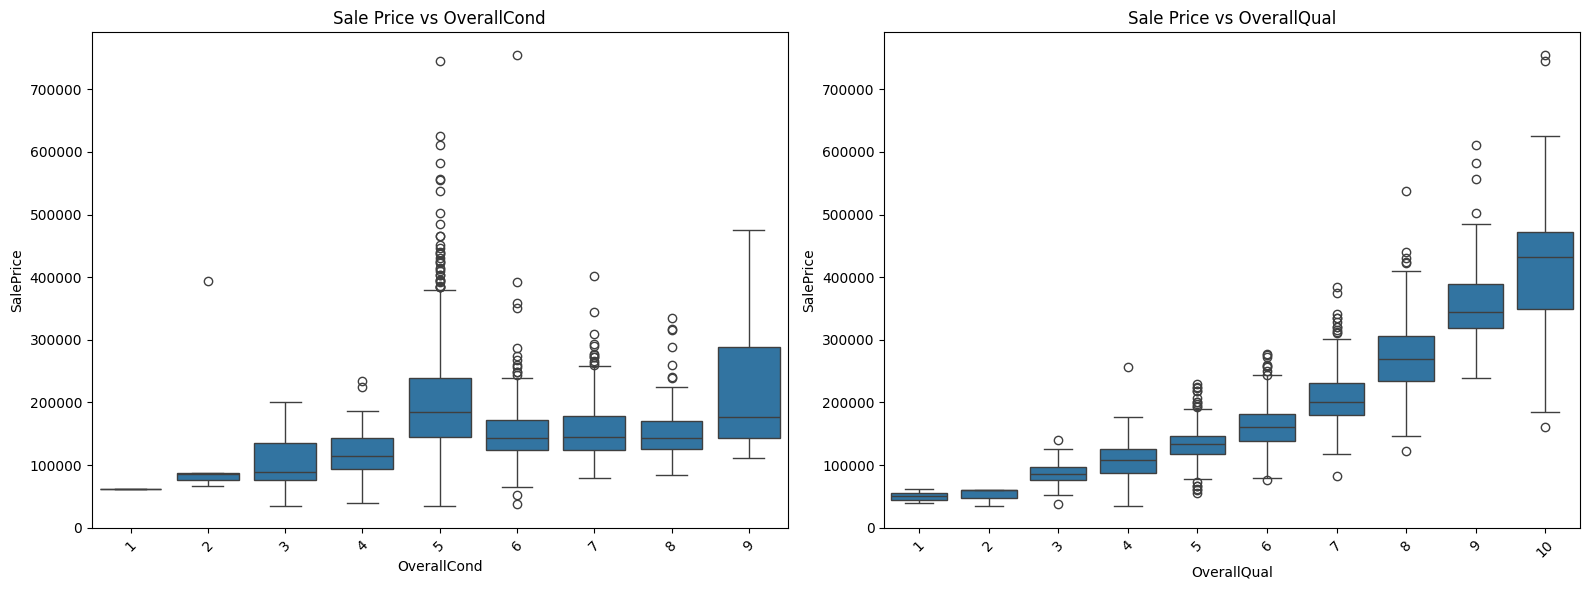

ZALEŻNOŚĆ SALES PRICE OD YEARBUILT


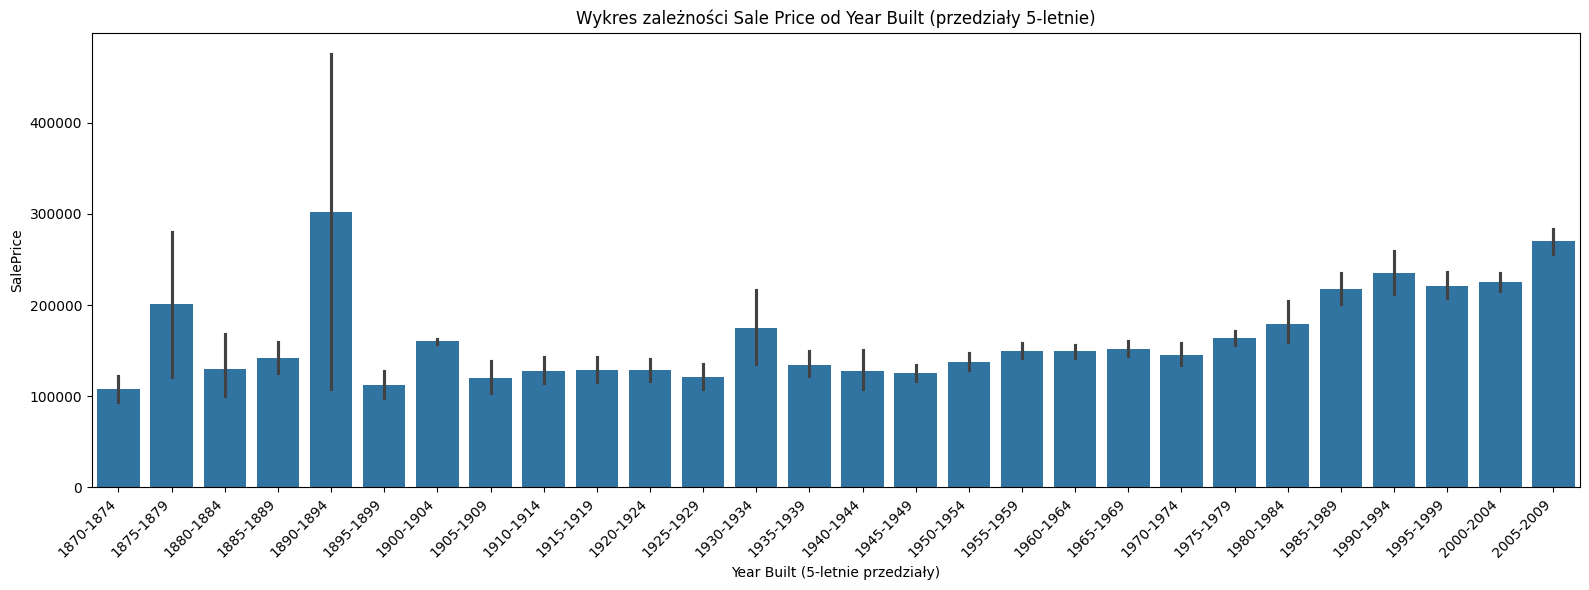

ZALEŻNOŚĆ SALES PRICE OD YearRemodAdd


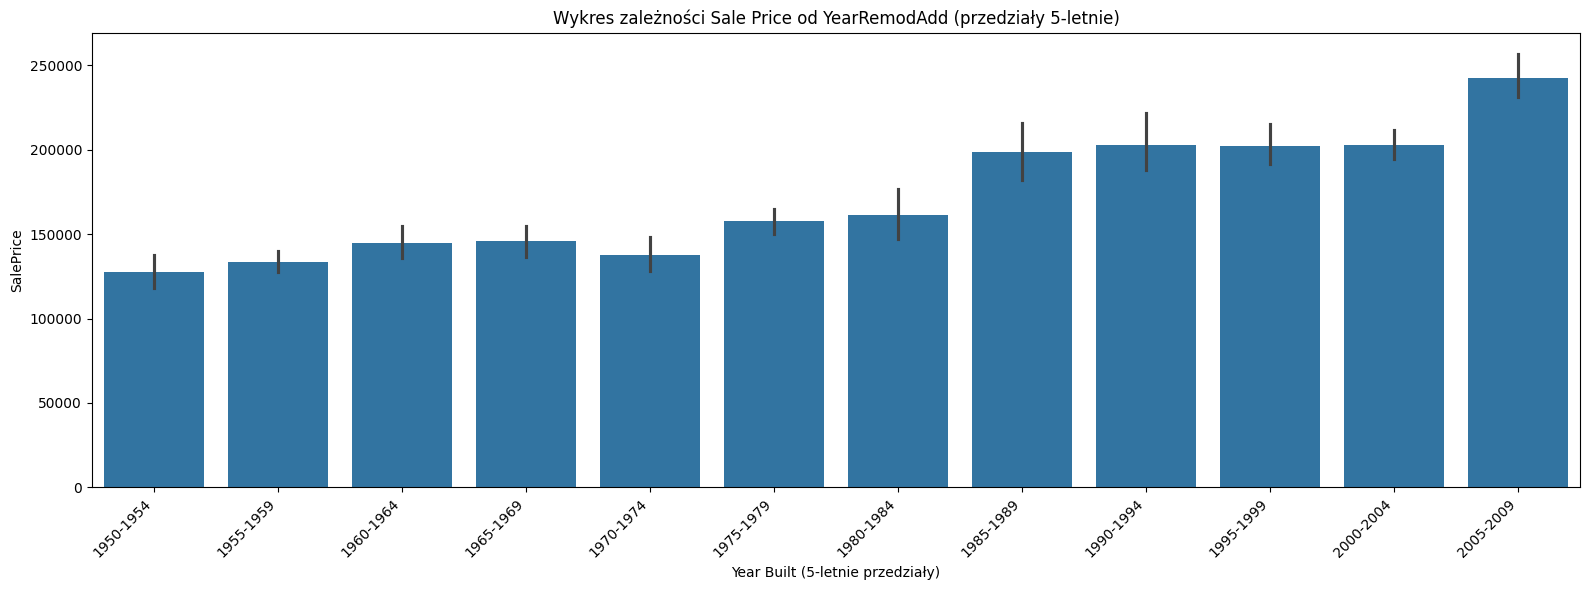

ZALEŻNOŚĆ SALES PRICE OD GarageType


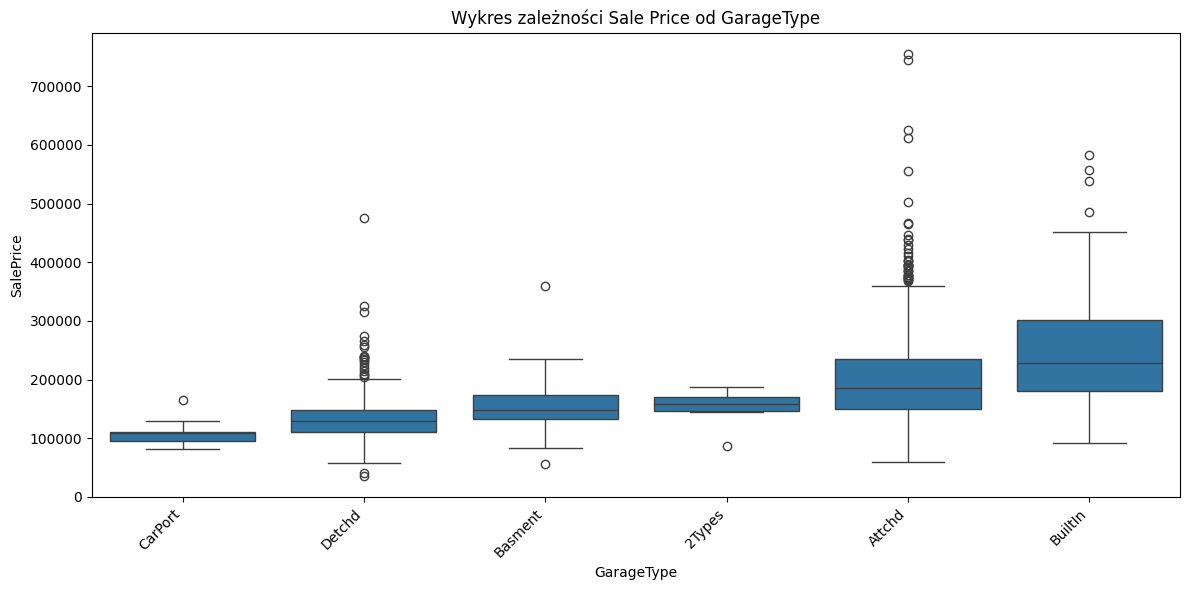

ZALEŻNOŚĆ SALES PRICE OD PoolQC


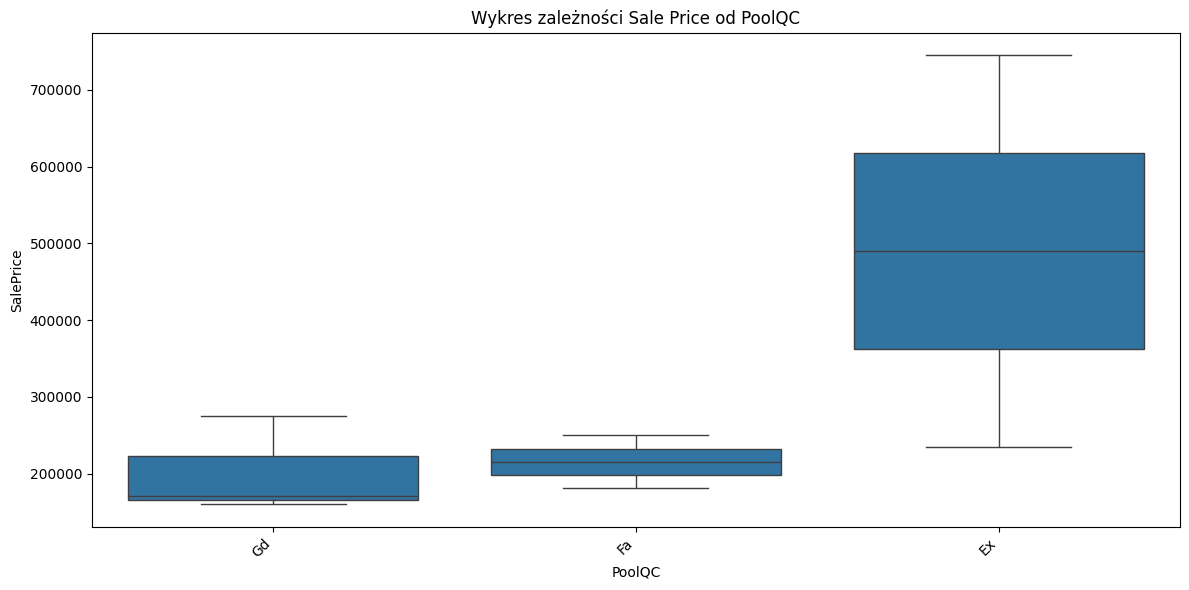

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("train.csv")
print(df.head())
print(df.describe().T)


print("\nSprawdźmy podstawowe informacje o SalePrice")
print("Minimalna cena: ",df['SalePrice'].min())
print("Maksymalna cena: ",df['SalePrice'].max())
print("Mediana: ",df['SalePrice'].median())
print("Średnia: ",df['SalePrice'].mean())
print("Q1: ",df['SalePrice'].quantile(0.25))
print("Q3: ",df['SalePrice'].quantile(0.75))


plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('Sale Price Histogram')
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD LOT AREA")
print("=" * 60)

plt.figure(figsize=(10,6))
plt.scatter(df['LotArea'], df['SalePrice'], s=10, alpha=0.3)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od Lot Area')
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD LOT GRLIVAREA")
print("=" * 60)

plt.figure(figsize=(10,6))
plt.scatter(df['GrLivArea'], df['SalePrice'], s=10, alpha=0.3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od GrLivArea')
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD NEIGHBOURHOOD")
print("=" * 60)
order_neighborhood = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=order_neighborhood)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD OVERALLCOND ORAZ OVERALLQUAL")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=axes[0], x='OverallCond', y='SalePrice', data=df)
axes[0].set_xlabel('OverallCond')
axes[0].set_ylabel('SalePrice')
axes[0].set_title('Sale Price vs OverallCond')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x='OverallQual', y='SalePrice', data=df)
axes[1].set_xlabel('OverallQual')
axes[1].set_ylabel('SalePrice')
axes[1].set_title('Sale Price vs OverallQual')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD YEARBUILT")
print("=" * 60)
bins = list(range(df['YearBuilt'].min() // 5 * 5, df['YearBuilt'].max() + 5, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df['YearBuilt_group'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels, right=True)

order = df['YearBuilt_group'].cat.categories

plt.figure(figsize=(16,6))
sns.barplot(x='YearBuilt_group', y='SalePrice', data=df, order=order)
plt.xlabel('Year Built (5-letnie przedziały)')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od Year Built (przedziały 5-letnie)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD YEARREMODADD")
print("=" * 60)
bins = list(range(df['YearRemodAdd'].min() // 5 * 5, df['YearRemodAdd'].max() + 5, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df['YearRemodAdd_group'] = pd.cut(df['YearRemodAdd'], bins=bins, labels=labels, right=True)

order = df['YearRemodAdd_group'].cat.categories

plt.figure(figsize=(16,6))
sns.barplot(x='YearRemodAdd_group', y='SalePrice', data=df, order=order)
plt.xlabel('Year Built (5-letnie przedziały)')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od YearRemodAdd (przedziały 5-letnie)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD GARAGETYPE")
print("=" * 60)
order_neighborhood = df.groupby('GarageType')['SalePrice'].median().sort_values().index
plt.figure(figsize=(12,6))
sns.boxplot(x='GarageType', y='SalePrice', data=df, order=order_neighborhood)
plt.xlabel('GarageType')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od GarageType')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("=" * 60)
print("ZALEŻNOŚĆ SALES PRICE OD POOLQC")
print("=" * 60)
order_neighborhood = df.groupby('PoolQC')['SalePrice'].median().sort_values().index
plt.figure(figsize=(12,6))
sns.boxplot(x='PoolQC', y='SalePrice', data=df, order=order_neighborhood)
plt.xlabel('PoolQC')
plt.ylabel('SalePrice')
plt.title('Wykres zależności Sale Price od PoolQC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Na podstawie powyższych wykresów można wysunąć następujące wnioski:

1. Na samym początku analizy danych należy zapoznać się z posiadanymi informacjami. Używamy funkcji describe() i head() oraz opisów kolumn dostęnych w pliku data_description.txt, aby zobaczyć, jakimi kolumnami dysponujemy w pliku i wybieramy te, które mogą rzeczywiście wpływać na cenę domu - będą one dalej analizowane.

2. W przypadku tego zadania, wybrane do dalszej analizy kolumny to: LotArea, GrLivArea, Neighborhood, OverallCond, OverallQual, YearBuilt, YearRemodAdd, GarageType, PoolQC oraz SalePrice.

3. Na samym początku badamy naszą główną zmienną - SalePrice. Na podstawie wygenerowanego histogramu stwierdzono, że ceny domów nie podlegają rozkładowi normalnemu. Jest więcej tańszych domów i mniej droższych.

4. ZALEŻNOŚĆ SALES PRICE OD LOT AREA - na podstawie wygenerowanego wykresu widać, że im większa parcela tym większe koszta, chociaż nie jest to silna zależność. Dużo mocniej związane są ze sobą SalesPrice i GrLivArea.

5. Porównójąc zależność między GrLivArea i SalePrice z zależnością między LotArea i SalePrice można zauważyć, że powierzchnia mieszkalna domu jest dużo mocniej związana z ceną niż powierzchnia parceli. Oczywistość okazuje się prawdziwa - im większa powierzchnia mieszkalna tym wyraźnie większa jest cena domu.

6. ZALEŻNOŚĆ SALES PRICE OD NEIGHBOURHOOD - na podstawie wykresu można określić, w których sąsiedztwach występują najdroższe domy. Ogólnie najdrożej jest w Stone Brook, Northridge i Northridge Heights, a najtaniej w Meadow Village.

7. ZALEŻNOŚĆ SALES PRICE OD OVERALLCOND ORAZ OVERALLQUAL - wykresy pokazują, że wraz z rosnącą oceną stanu domu, rośnie również jego cena. Ponadto im wyższa ocena domu, tym więcej outliersów w przypadku tej cechy.

8. ZALEŻNOŚĆ SALES PRICE OD YEARBUILT - wykres pokazuje, że ogólna tendencja polega na tym, że im nowszy jest dom, tym droższy. Są jednak znaczące wyjątki w latach 1875-1879 oraz 1890-1894 spowodowane najprawdopodobniej pojedynczymi domami o bardzo wysokich cenach.

9. ZALEŻNOŚĆ SALES PRICE OD YEARREMODADD - domy z datą przebudowy po 1990 są droższe, w szczególności te, które przebudowano po 2005.

10. ZALEŻNOŚĆ SALES PRICE OD GARAGETYPE - jak widać cena może zależeć również od garażu - najdroższe są domy z garażem typu built-in, najtańsze z samym miejscem parkingowym.

11. ZALEŻNOŚĆ SALES PRICE OD PoolQC - również tutaj widać zależność między ceną a badaną cechą - domy z basenami w idealnym stanie charakteryzują się zdecydowanie wyższą ceną.

12. Ciężko jednoznacznie stwierdzić, które kolumny należy przebadać, aby uzyskać kompletną informację o wpływie poszczególnych cech na cenę domu - najlepiej wybrać te cechy, które rzeczywiście interesują kupującego i na nich oprzeć dalszą analizę. Pokazane wyżej wykresy mogą służyć za podstawę, która rysuje ogólne zależności i wpływ poszczególnych cech na cenę domu.

